In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import ElasticNet,Lasso,Ridge
from sklearn.model_selection import KFold,cross_val_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler



C:\Users\hasan\AppData\Local\Temp\ipykernel_11312\4088980539.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dfTrain = pd.read_csv("train.csv")
dfTest = pd.read_csv("test.csv")
dfGender = pd.read_csv("gender_submission.csv")

In [3]:
dfTest.drop(["PassengerId"],axis=1,inplace=True)
dfTest


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
dfTest = dfGender.merge(dfTest,right_index=True,left_index=True)
dfTest

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
dfTrain = pd.concat([dfTrain,dfTest],axis=0,ignore_index=True)
dfTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [7]:
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
def dataFrameBagimliBol(myDataFrame):
    return myDataFrame.iloc[:,1:2]

In [9]:
dfTrainBagimli = dataFrameBagimliBol(dfTrain)
dfTrainBagimli.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [10]:
dfTestBagimli = dataFrameBagimliBol(dfTest)
dfTestBagimli.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [11]:
def dataFrameBol(myDataFrame):
    cikarilacakListe = ["PassengerId","Survived","Name","Ticket","Cabin"]
    myDataFrame = myDataFrame.drop(cikarilacakListe,axis=1)
    return myDataFrame

In [12]:
dfTrainBagimsiz = dataFrameBol(dfTrain)
dfTrainBagimsiz.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [13]:
dfTestBagimsiz = dataFrameBol(dfTest)
dfTestBagimsiz.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [14]:
def veriGorsellestir(myDataFrame):
    sns.set_theme(style="ticks")
    sns.pairplot(myDataFrame, hue="Survived")   


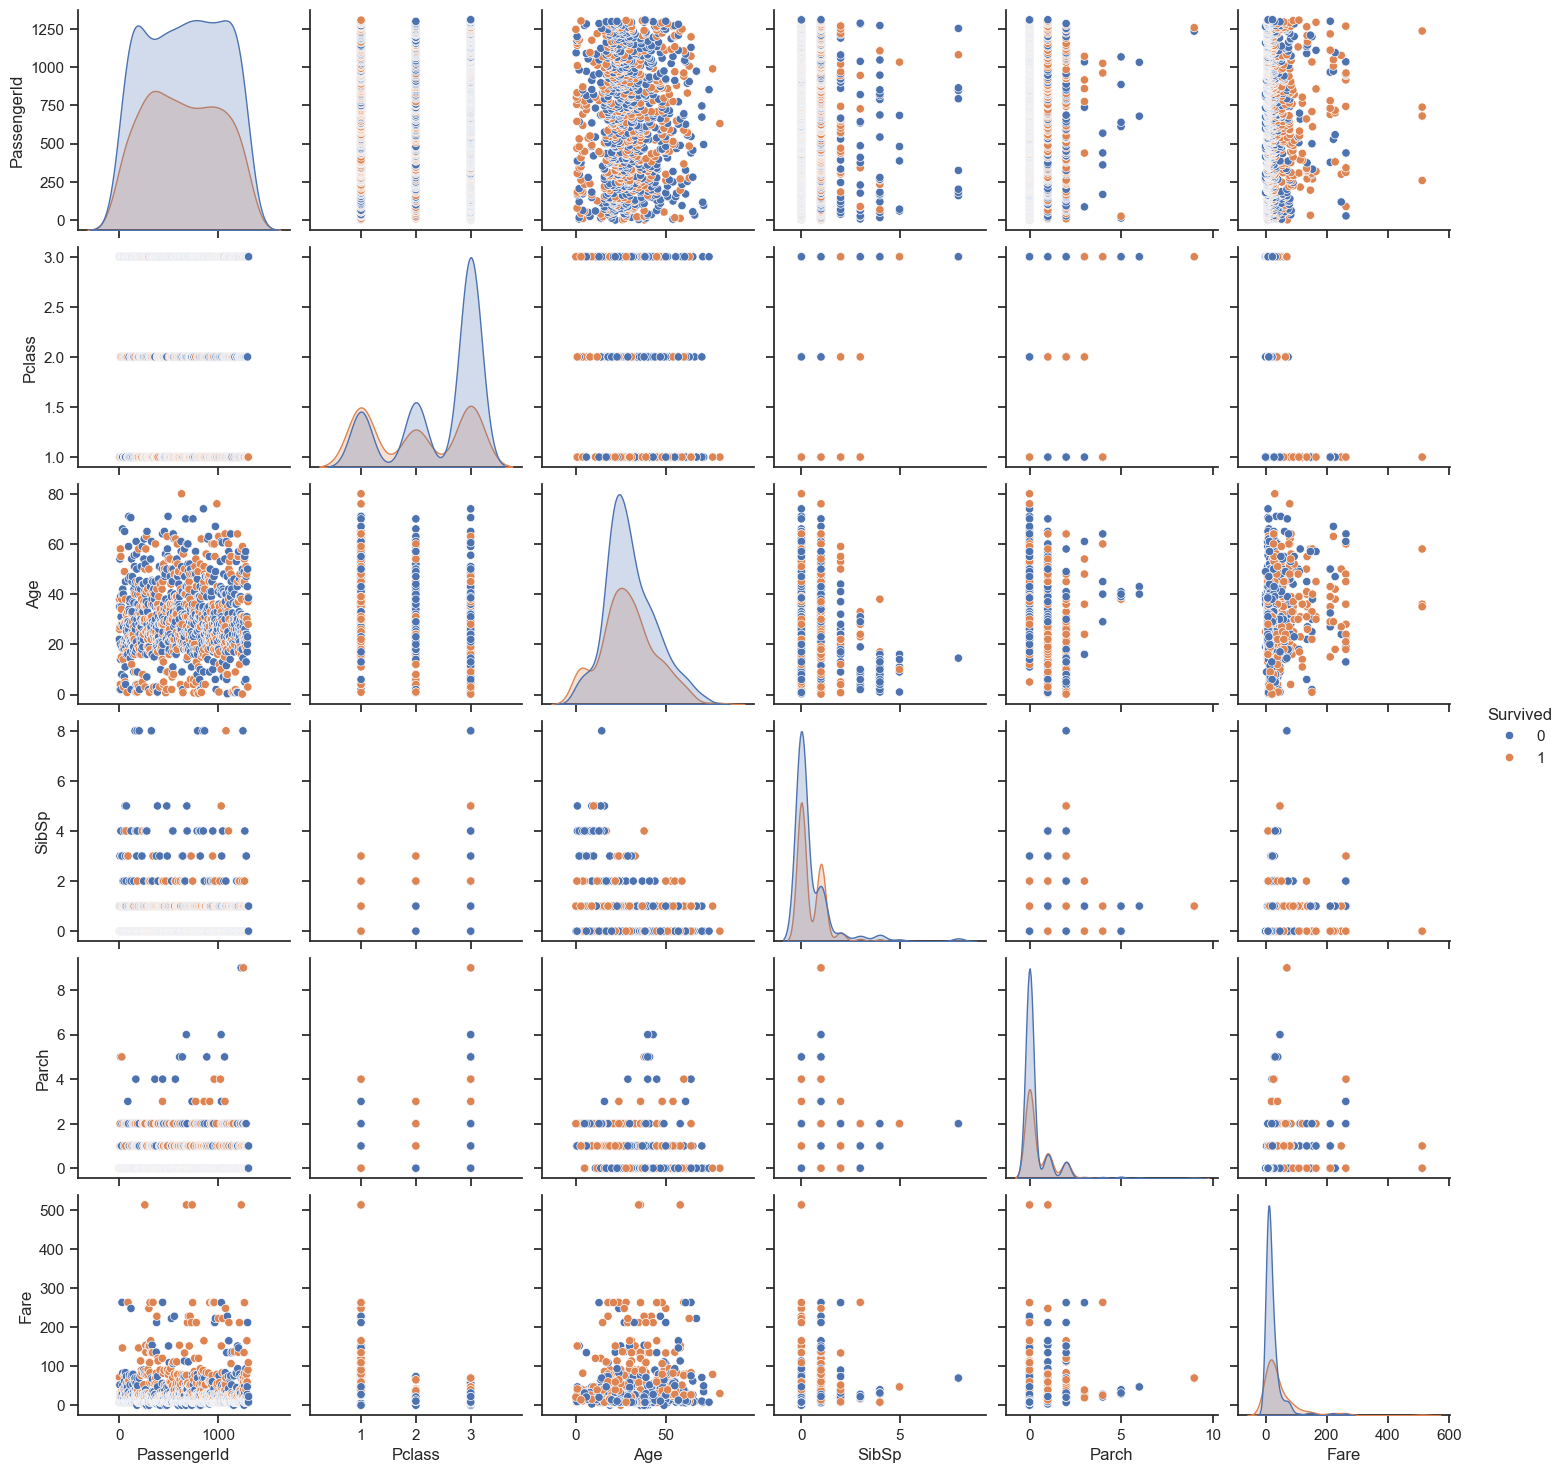

In [15]:
veriGorsellestir(dfTrain)


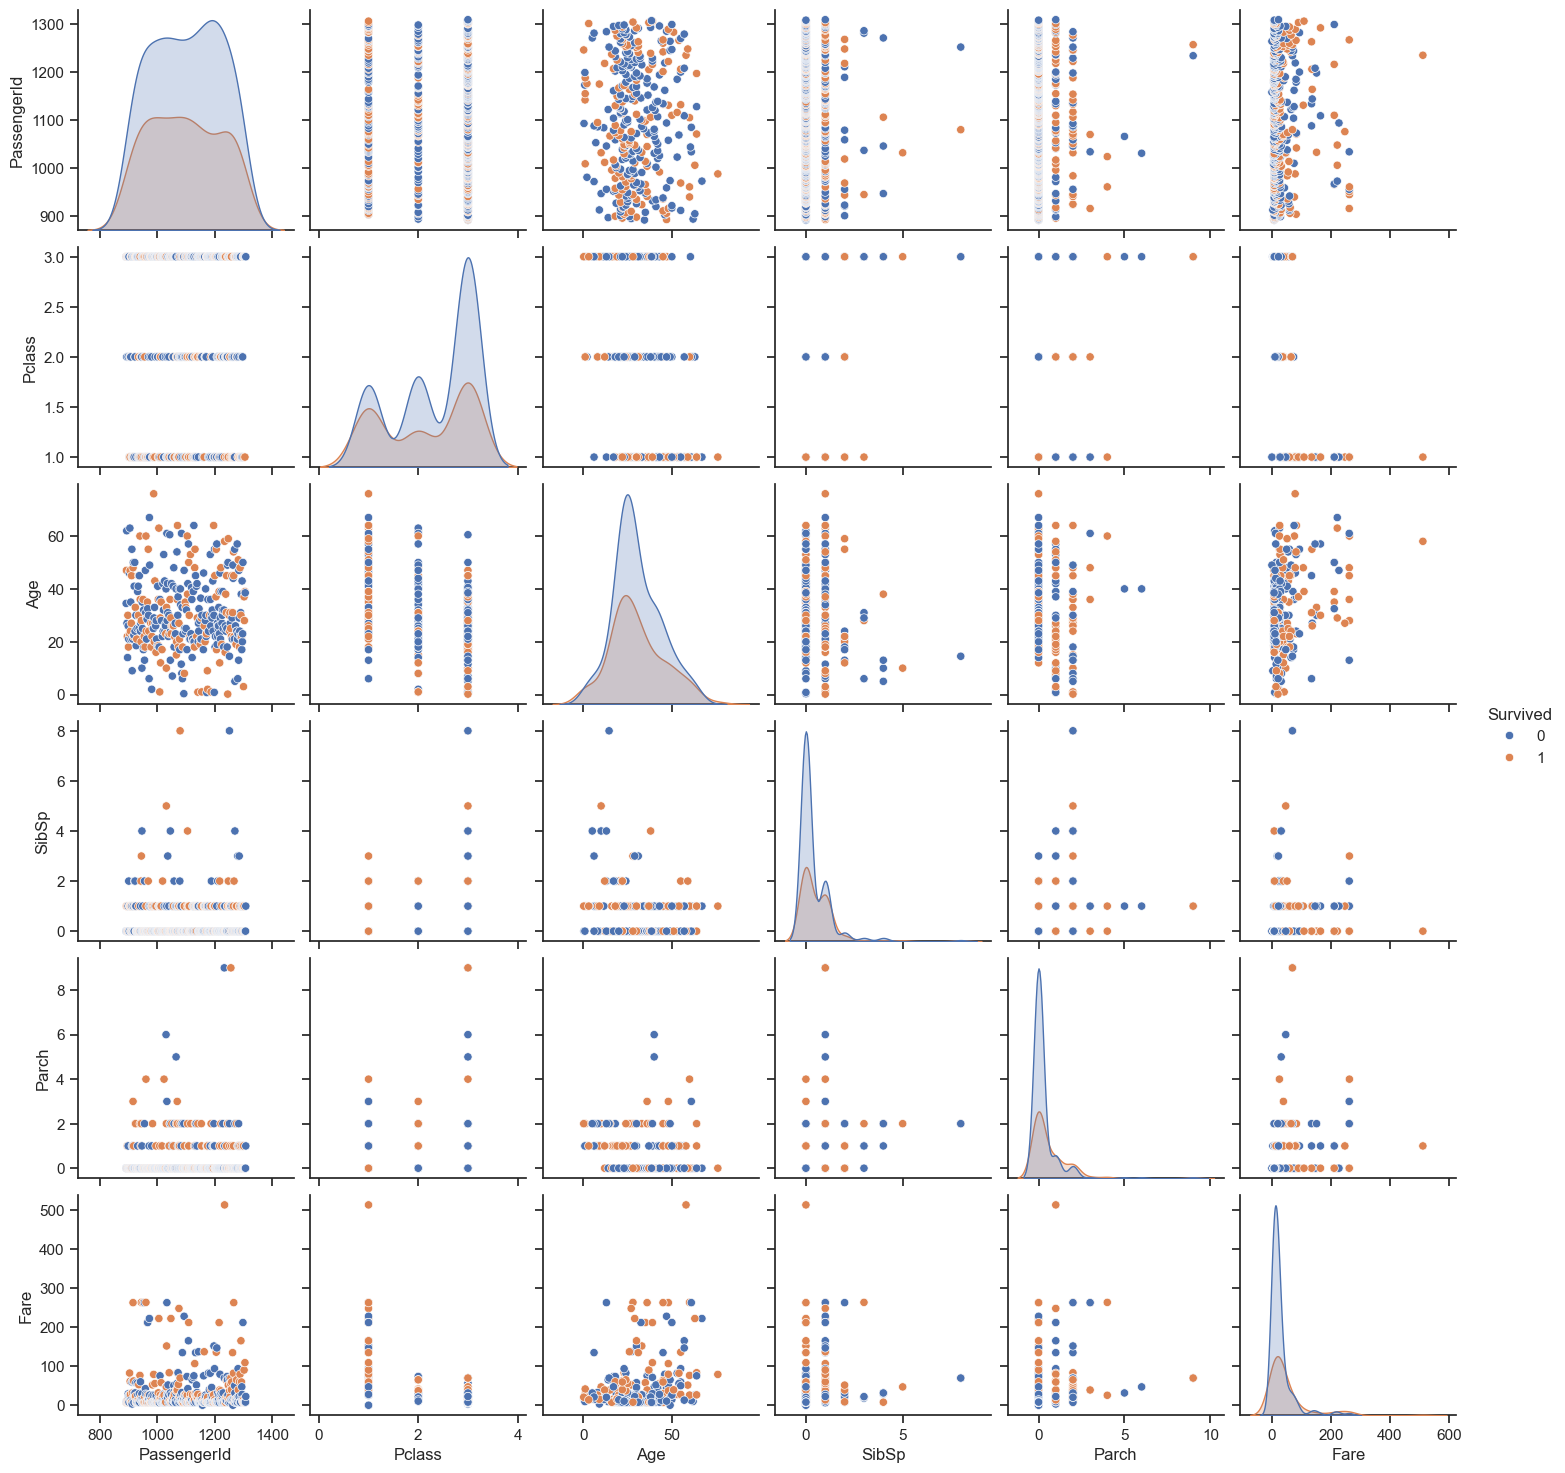

In [16]:
veriGorsellestir(dfTest)

In [17]:
def kategorikCevir(myDataFrame):
    return pd.get_dummies(myDataFrame,columns = ["Pclass","Sex","Embarked"],dtype=int,drop_first=True)

In [18]:
dfTrainBagimsiz = kategorikCevir(dfTrainBagimsiz)
dfTrainBagimsiz.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


In [19]:
dfTestBagimsiz = kategorikCevir(dfTestBagimsiz)
dfTestBagimsiz.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


In [20]:
def nanDegerAta(myDataFrame):
    for i in myDataFrame.columns:
        myDataFrame[i] = myDataFrame[i].fillna(myDataFrame[i].median())
    return myDataFrame


In [21]:
dfTrainBagimsiz = nanDegerAta(dfTrainBagimsiz)
dfTrainBagimsiz.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


In [22]:
dfTestBagimsiz = nanDegerAta(dfTestBagimsiz)
dfTestBagimsiz.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


In [23]:
x_train,x_test,y_train,y_test = train_test_split(dfTrainBagimsiz,dfTrainBagimli,random_state=10)

In [24]:
sc = MinMaxScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [25]:
logReg = LogisticRegression(random_state=10)
logReg.fit(X_train,y_train.ravel())
y_pred = logReg.predict(X_test)
cmLogReg = confusion_matrix(y_test,y_pred)
accScoreLogReg = metrics.accuracy_score(y_test,y_pred)
print(f"Confusion Matrix: {cmLogReg}")
print(f"Accuracy Score: {accScoreLogReg}")

Confusion Matrix: [[181  14]
 [ 23 110]]
Accuracy Score: 0.8871951219512195


In [26]:
from sklearn.neighbors import KNeighborsClassifier
liste = ["euclidean","cosine","hamming","manhattan","minkowski","chebyshev"]
sonuc = {}
for i in range(len(liste)):
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric=liste[i], n_neighbors=10)
    knn.fit(X_train,y_train.ravel())
    y_pred = knn.predict(X_test)
    cmKNN = confusion_matrix(y_test,y_pred)
    accScoreKNN = metrics.accuracy_score(y_test,y_pred)
    print(liste[i])
    print("Confusion Matrix:")
    print(f"{cmKNN}")
    print(f"Accuracy Score: {accScoreKNN}")
    print("****************************************************")
    sonuc.update({liste[i]:f"{cmKNN},{accScoreKNN}"})


euclidean
Confusion Matrix:
[[183  12]
 [ 28 105]]
Accuracy Score: 0.8780487804878049
****************************************************
cosine
Confusion Matrix:
[[183  12]
 [ 29 104]]
Accuracy Score: 0.875
****************************************************
hamming
Confusion Matrix:
[[181  14]
 [ 38  95]]
Accuracy Score: 0.8414634146341463
****************************************************
manhattan
Confusion Matrix:
[[184  11]
 [ 28 105]]
Accuracy Score: 0.8810975609756098
****************************************************
minkowski
Confusion Matrix:
[[183  12]
 [ 28 105]]
Accuracy Score: 0.8780487804878049
****************************************************
chebyshev
Confusion Matrix:
[[184  11]
 [ 27 106]]
Accuracy Score: 0.8841463414634146
****************************************************


In [27]:
from sklearn.svm import SVC
kernels = ["linear","rbf","poly"]
gammas = [0.1,1]
cListes = [0.1,1]
for i in kernels:
    for j in gammas:
        for k in cListes:
            svc = SVC(kernel=i,gamma=j,C=k)
            svc.fit(X_train,y_train.ravel())
            y_pred = svc.predict(X_test)

            cmSVC = confusion_matrix(y_test,y_pred)
            accScoreSVC = metrics.accuracy_score(y_test,y_pred)
            print(i)
            print(j)
            print(k)
            print(f"Confusion Matrix: {cmSVC}")
            print(f"Accuracy Score: {accScoreSVC}")
            print("*********************************************")

linear
0.1
0.1
Confusion Matrix: [[180  15]
 [ 23 110]]
Accuracy Score: 0.8841463414634146
*********************************************
linear
0.1
1
Confusion Matrix: [[180  15]
 [ 23 110]]
Accuracy Score: 0.8841463414634146
*********************************************
linear
1
0.1
Confusion Matrix: [[180  15]
 [ 23 110]]
Accuracy Score: 0.8841463414634146
*********************************************
linear
1
1
Confusion Matrix: [[180  15]
 [ 23 110]]
Accuracy Score: 0.8841463414634146
*********************************************
rbf
0.1
0.1
Confusion Matrix: [[180  15]
 [ 23 110]]
Accuracy Score: 0.8841463414634146
*********************************************
rbf
0.1
1
Confusion Matrix: [[180  15]
 [ 23 110]]
Accuracy Score: 0.8841463414634146
*********************************************
rbf
1
0.1
Confusion Matrix: [[181  14]
 [ 23 110]]
Accuracy Score: 0.8871951219512195
*********************************************
rbf
1
1
Confusion Matrix: [[183  12]
 [ 26 107]]
Accuracy Scor

In [28]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB,ComplementNB,MultinomialNB
algoritmaListesi = [BernoulliNB(),CategoricalNB(),ComplementNB(),MultinomialNB()]
for i in algoritmaListesi:
    nb = i
    nb.fit(X_train, y_train.ravel())
    cmG = confusion_matrix(y_test,y_pred)
    accScore = metrics.accuracy_score(y_test,y_pred)
    print(i)
    print(f"Confusion Matrix: {cmG}")
    print(f"Accuracy Score: {accScore}")
    print("*****************************************")

BernoulliNB()
Confusion Matrix: [[182  13]
 [ 26 107]]
Accuracy Score: 0.8810975609756098
*****************************************
CategoricalNB()
Confusion Matrix: [[182  13]
 [ 26 107]]
Accuracy Score: 0.8810975609756098
*****************************************
ComplementNB()
Confusion Matrix: [[182  13]
 [ 26 107]]
Accuracy Score: 0.8810975609756098
*****************************************
MultinomialNB()
Confusion Matrix: [[182  13]
 [ 26 107]]
Accuracy Score: 0.8810975609756098
*****************************************


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')

dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
cmDTC = confusion_matrix(y_test,y_pred)
accScoreDTC = metrics.accuracy_score(y_test,y_pred)
print(f"Confusion Matrix: {cmDTC}")
print(f"Accuracy Score: {accScoreDTC}")

Confusion Matrix: [[172  23]
 [ 28 105]]
Accuracy Score: 0.8445121951219512


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train.ravel())

y_pred = rfc.predict(X_test)
cmRFC = confusion_matrix(y_test,y_pred)
accScoreRFC = metrics.accuracy_score(y_test,y_pred)
print(f"Confusion Matrix: {cmRFC}")
print(f"Accuracy Score: {accScoreRFC}")

Confusion Matrix: [[173  22]
 [ 31 102]]
Accuracy Score: 0.8384146341463414


In [31]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(units = 9, activation = 'relu'),
    keras.layers.Dense(units = 10,activation = 'relu'),
    keras.layers.Dense(units = 1,activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist = model.fit(X_train, y_train,  validation_data=(X_test, y_test),batch_size = 30, epochs = 30)
model.summary()
model.evaluate(X_test, y_test,batch_size=30)





Epoch 1/30


33/33 [==============================] - 1s 5ms/step - loss: 0.6922 - accuracy: 0.5138 - val_loss: 0.6700 - val_accuracy: 0.5274
Epoch 2/30
33/33 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.5994 - val_loss: 0.6390 - val_accuracy: 0.5915
Epoch 3/30
33/33 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.6340 - val_loss: 0.6143 - val_accuracy: 0.5945
Epoch 4/30
33/33 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.6371 - val_loss: 0.5894 - val_accuracy: 0.6006
Epoch 5/30
33/33 [==============================] - 0s 1ms/step - loss: 0.5707 - accuracy: 0.6616 - val_loss: 0.5647 - val_accuracy: 0.6585
Epoch 6/30
33/33 [==============================] - 0s 1ms/step - loss: 0.5476 - accuracy: 0.7003 - val_loss: 0.5358 - val_accuracy: 0.6951
Epoch 7/30
33/33 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7360 - val_loss: 0.5041 - val_accuracy: 0.7134
Epoch 8/30
33/3

[0.35419467091560364, 0.8780487775802612]

[]

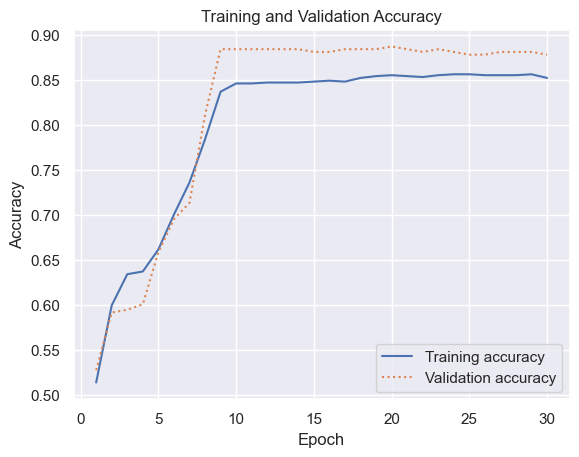

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()